# Import libaries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data preprocessing

- **Variables**
    - **Hours Studied**: Total hours each student has studied.
    - **Previous Scores**: Scores achieved by students in previous tests.
    - **Extracurricular Activities**: Whether students participate in extracurricular activities (Yes or No).
    - **Sleep Hours**: Average number of sleep hours each day for students.
    - **Sample Question Papers Practiced**: Number of sample papers practiced by students.
- **Target Variable**
    - **Performance Index**: A measure of each student's overall academic performance, rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

## Read and Explore Data

In [2]:
# Read student_performance.csv
student_performance = pd.read_csv("../../../../data/regression/student_performance.csv")

# Convert data to DataFrame
df = pd.DataFrame(student_performance)

print("Display data")
print(df.head())

Display data
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [3]:
# Show shape (rows, columns)
df.shape

(10000, 6)

In [4]:
# Display detailed info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
# Numerical features
numerical_cols = [cname for cname in df.select_dtypes(include=np.number).columns.drop("Performance Index")]
print(f"Đặc trưng số: \n {numerical_cols}")

# Categorical features
categorical_cols = [col for col in df.select_dtypes(exclude=np.number).columns]
print(f"Đặc trưng phân loại: \n {categorical_cols}")

Đặc trưng số: 
 ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
Đặc trưng phân loại: 
 ['Extracurricular Activities']


In [6]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [7]:
# Check unique values in each column
df.nunique()

Hours Studied                        9
Previous Scores                     60
Extracurricular Activities           2
Sleep Hours                          6
Sample Question Papers Practiced    10
Performance Index                   91
dtype: int64

In [8]:
# Correlation matrix
corr = df[numerical_cols + ["Performance Index"]].corr()

<Axes: >

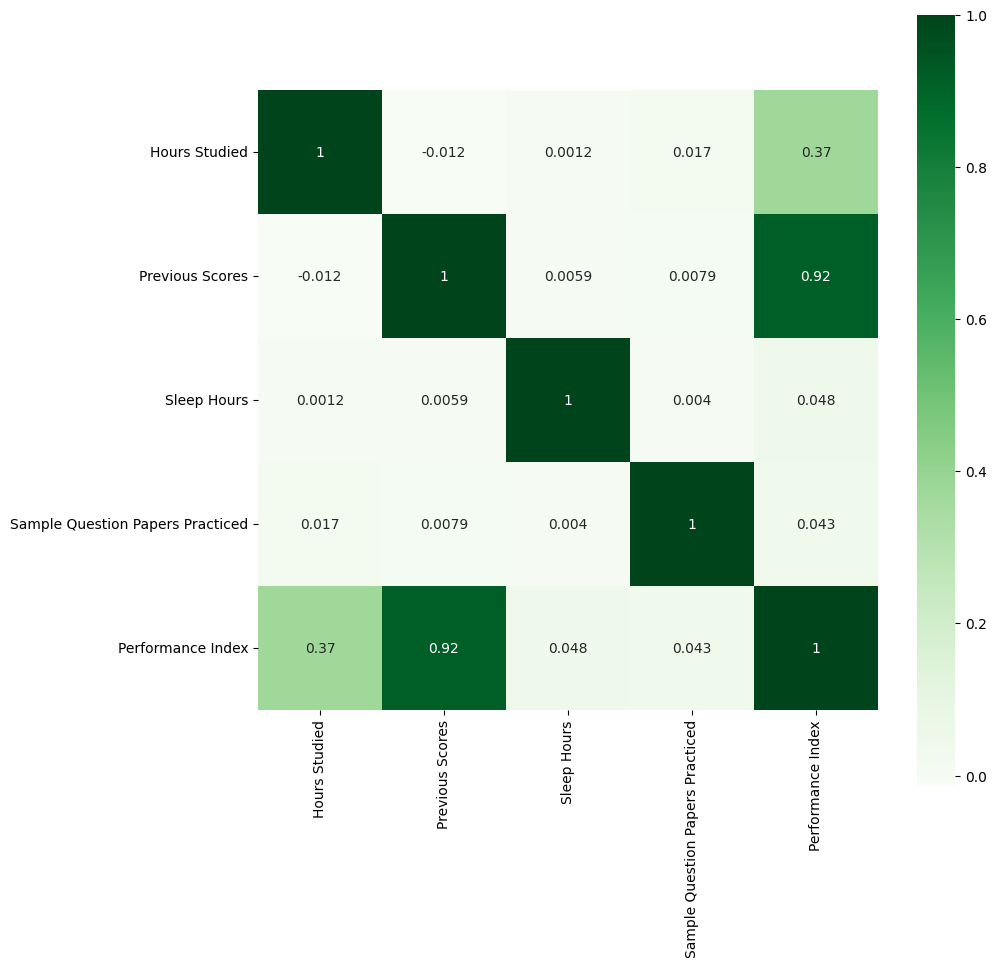

In [9]:
# Plot heatmap for correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, annot=True, annot_kws={"size":10}, cmap="Greens")

## Handle Missing Data

### Check for missing data

In [10]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [11]:
df[df.isnull().any(axis=1)]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index


- **Conclusion**: Check for missing data.

##  Feature Selection for Linear Regression

**Select target variable**

In [12]:
target_feature = "Performance Index"
target_var = df[target_feature]
target_var.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

**Select independent variables (Hours Studied, Previous Scores, Extracurricular Activities, Sleep Hours, Sample Question, Papers Practiced)**

In [13]:
# Encode Extracurricular Activities
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Extracurricular Activities"] = encoder.fit_transform(df["Extracurricular Activities"])

# Select independent variables
independent_var = df.drop(["Performance Index"], axis=1)
independent_var.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


<Axes: >

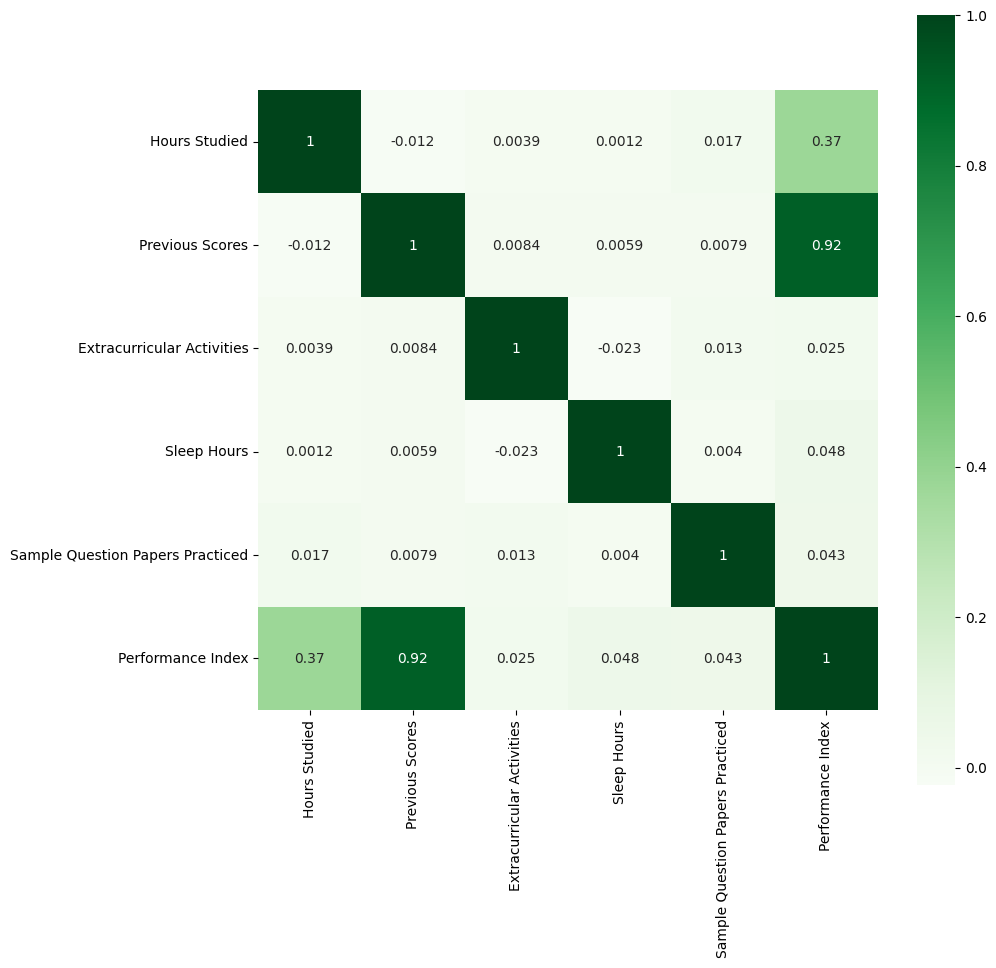

In [14]:
# Correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, annot=True, annot_kws={"size":10}, cmap="Greens")

**Coefficients of the linear model**

In [15]:
from sklearn.linear_model import LinearRegression

# Create Linear regressor
lm = LinearRegression()

# Select features
feature_names = df.drop(["Performance Index"], axis=1).columns.to_list()

lm.fit(independent_var, target_var)

# Print intercept
print(f"Hệ số chặn (intercept): {lm.intercept_}")

# Print coefficients
for fname, coef in zip(feature_names, lm.coef_):
    print(f"Hệ số của {fname}: {coef}")

Hệ số chặn (intercept): -34.0755880919136
Hệ số của Hours Studied: 2.852982053532593
Hệ số của Previous Scores: 1.0184341923340543
Hệ số của Extracurricular Activities: 0.6128975819601031
Hệ số của Sleep Hours: 0.4805597547118859
Hệ số của Sample Question Papers Practiced: 0.19380214006990187


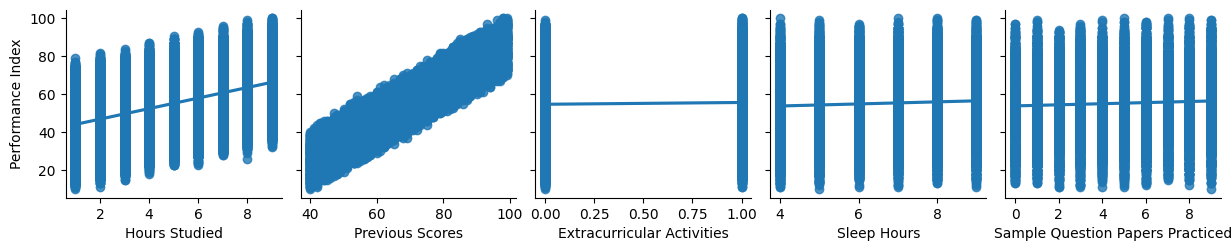

In [16]:
# Pairplot to evaluate linear assumptions
sns.pairplot(df, x_vars=feature_names, y_vars=target_feature, kind="reg");

# Split the Data

In [17]:
X = independent_var
y = target_var

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size= 0.7, random_state= 0)

In [19]:
# Scale data with StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Tập huấn luyện sau khi chuẩn hóa: \n {X_train[:3,:]}")
print(f"Tập kiểm thử sau khi chuẩn hóa: \n {X_test[:3,:]}")

Tập huấn luyện sau khi chuẩn hóa: 
 [[ 1.54224488e+00 -5.42230263e-01 -9.98287181e-01 -1.49450228e+00
   1.43151456e-01]
 [ 1.15644943e+00 -1.52076261e+00 -9.98287181e-01 -9.05087895e-01
   1.43151456e-01]
 [-9.36931813e-04  2.63619903e-01  1.00171576e+00 -1.49450228e+00
   4.92179736e-01]]
Tập kiểm thử sau khi chuẩn hóa: 
 [[-0.38673238 -0.13930518 -0.99828718  1.45256966 -0.5549051 ]
 [ 1.15644943 -0.54223026 -0.99828718 -1.49450228  0.84120802]
 [ 0.38485852  1.18459152 -0.99828718 -0.90508789  0.49217974]]


# Train the Model

In [20]:
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
# Value of y intercept
lm.intercept_

np.float64(55.22585714285715)

In [22]:
# Hiển thị hệ số (coeffcients)
for fname, coef in zip(feature_names, lm.coef_):
    print(f"Hệ số của {fname}: {coef}")

Hệ số của Hours Studied: 7.3862455953136035
Hệ số của Previous Scores: 17.710287095862203
Hệ số của Extracurricular Activities: 0.3108930112431775
Hệ số của Sleep Hours: 0.8046329282257113
Hệ số của Sample Question Papers Practiced: 0.533804385236094


# Model Evaluation

## Evaluate the Model on Training Set

In [23]:
# Predict on training set
y_pred = lm.predict(X_train)

# Check 10 instances
print("Input: " + str(X_train[0:9]))
print("Output: " + str(y_pred[0:9]))
print("True value: " + str(y_train[0:9].values))

Input: [[ 1.54224488e+00 -5.42230263e-01 -9.98287181e-01 -1.49450228e+00
   1.43151456e-01]
 [ 1.15644943e+00 -1.52076261e+00 -9.98287181e-01 -9.05087895e-01
   1.43151456e-01]
 [-9.36931813e-04  2.63619903e-01  1.00171576e+00 -1.49450228e+00
   4.92179736e-01]
 [ 1.54224488e+00 -1.00271607e+00 -9.98287181e-01 -9.05087895e-01
   1.53926457e+00]
 [ 1.15644943e+00 -7.14912442e-01 -9.98287181e-01 -9.05087895e-01
  -2.05876824e-01]
 [-1.15832329e+00 -5.42230263e-01 -9.98287181e-01  2.73740882e-01
  -5.54905104e-01]
 [-9.36931813e-04  1.12703079e+00  1.00171576e+00  8.63155271e-01
  -9.03933383e-01]
 [-9.36931813e-04 -1.52076261e+00 -9.98287181e-01  1.45256966e+00
   8.41208015e-01]
 [ 1.15644943e+00  1.29971297e+00 -9.98287181e-01 -1.49450228e+00
   4.92179736e-01]]
Output: [55.57773157 35.87232508 59.25934928 48.64190921 49.95785005 36.68083286
 75.70240165 29.59325975 85.53580796]
True value: [55. 34. 60. 48. 53. 35. 75. 35. 87.]


In [24]:
# Evaluate model
print("R^2:", metrics.r2_score(y_train, y_pred))
print("Adjusted R^2:", 1 - (1 - metrics.r2_score(y_train, y_pred)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1))
print("MAE:", metrics.mean_absolute_error(y_train, y_pred))
print("MSE:", metrics.mean_squared_error(y_train, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.988725946864821
Adjusted R^2: 0.9887178870613214
MAE: 1.6271540006773895
MSE: 4.200718511407366
RMSE: 2.0495654445290024


- R^2: A measure of the linear relationship between X and Y. It is understood as the percentage of the variance in the dependent variable that can be predicted from the independent variables.
- Adjusted R^2: Adjusted R-squared compares the explanatory power of regression models with different numbers of predictor variables.
- MAE (Mean Absolute Error): The average of the absolute values of the errors. It measures the difference between two continuous variables, here the actual value and the predicted value of y.
- MSE (Mean Squared Error): Mean squared error (MSE) is similar to MAE, but squares the errors before aggregating them instead of using the absolute value.
- RMSE (Root Mean Squared Error): Unlike MAE, RMSE is calculated based on MSE by taking the square root of MSE. RMSE indicates the average deviation between predicted values and actual values, in the same unit of measure as the original data.

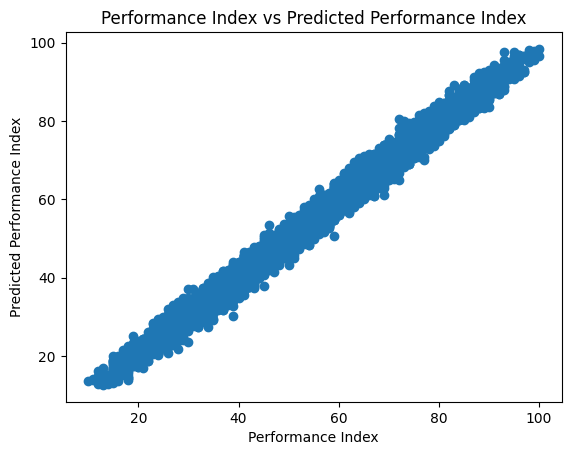

In [25]:
# Scatter plot for actual vs predicted
plt.scatter(y_train, y_pred)
plt.xlabel("Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Performance Index vs Predicted Performance Index")
plt.show()

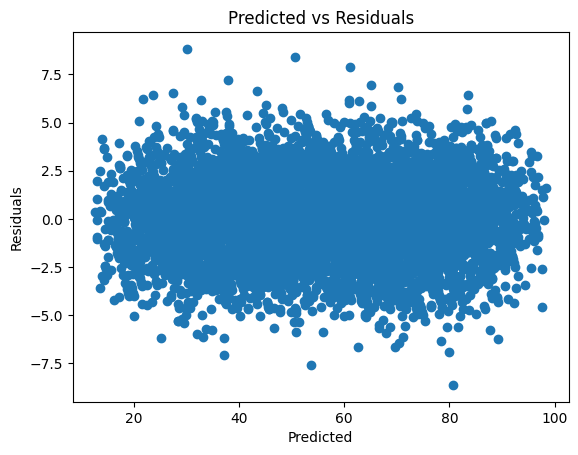

In [26]:
# Check residuals
plt.scatter(y_pred, y_train - y_pred)
plt.title("Predicted vs Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

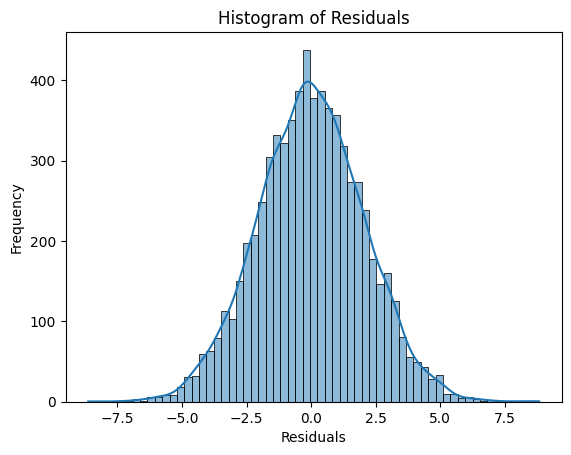

In [27]:
# Check normality of errors
sns.histplot(y_train - y_pred, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Evaluate the Model on Test Set

In [28]:
# Predict on test set
y_test_pred = lm.predict(X_test)

# Check 10 instances
print("Input: " + str(X_test[0:9]))
print("Output: " + str(y_test_pred[0:9]))
print("True value: " + str(y_test[0:9].values))

Input: [[-0.38673238 -0.13930518 -0.99828718  1.45256966 -0.5549051 ]
 [ 1.15644943 -0.54223026 -0.99828718 -1.49450228  0.84120802]
 [ 0.38485852  1.18459152 -0.99828718 -0.90508789  0.49217974]
 [-1.54411874 -1.0602768   1.00171576 -0.31567351  0.49217974]
 [-1.15832329  1.18459152 -0.99828718 -0.90508789  1.53926457]
 [ 0.38485852 -0.54223026  1.00171576 -0.90508789 -0.90393338]
 [ 1.54224488  0.95434862  1.00171576 -0.31567351 -0.20587682]
 [ 0.38485852 -0.25442663 -0.99828718  0.27374088  0.84120802]
 [-0.77252784 -0.02418373  1.00171576 -1.49450228 -0.20587682]]
Output: [50.46443613 53.10077726 78.27207629 25.36296322 67.43269493 47.56610236
 83.46657174 53.92148894 48.09047878]
True value: [53. 50. 80. 24. 64. 47. 83. 56. 47.]


In [29]:
# Evaluate model
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print("R^2:", acc_linreg)
print("Adjusted R^2:", 1 - (1 - metrics.r2_score(y_test, y_test_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print("MAE:", metrics.mean_absolute_error(y_test, y_test_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.9888065859708454
Adjusted R^2: 0.9887878928946444
MAE: 1.5950954457162967
MSE: 4.0395191916988535
RMSE: 2.0098555151300936


# Make Predictions

In [30]:
# Predict for a new student record
new_record = scaler.transform([[8, 90, 0, 8, 10]])
predicted_performance = lm.predict(new_record)
print(f"Predicted performance of a new student: {predicted_performance}")

Predicted performance of a new student: [86.1392742]
